# Results v1:

## Hyperparameters:

- Dataset: MNIST (scaled down to 7x7)
- Model: 2-layer MLP (49-32-ReLU-10)
- Batch sizes: 4, 8, 16, 32, 64
- Optimizer: SGD
- Learning rate: 0.001
- Epochs: 5
- GGN samples per epoch: 10

In [1]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
from tueplots import bundles

plt.rcParams.update(bundles.beamer_moml())

In [2]:
results_path = "../results/"
n_epochs = 5
n_samples = 10
batch_sizes = [4, 8, 16, 32, 64]

GGN_batched = []
GGN_total = []

for epoch_idx in range(n_epochs):
    GGN_batched_epoch = []
    for batch_size in batch_sizes:
        GGN_batched_epoch.append(np.load(str(Path(results_path, f"GGN_{batch_size}_batched_{epoch_idx}.npy"))))
    GGN_batched.append(GGN_batched_epoch)
    GGN_total.append(np.load(str(Path(results_path, f"GGN_total_{epoch_idx}.npy"))))

In [3]:
frobenius_distances = np.empty((len(batch_sizes), n_epochs, n_samples))

for epoch_idx in range(n_epochs):
    for batch_size_idx in range(len(batch_sizes)):
        for sample_idx in range(n_samples):
            frobenius_distances[batch_size_idx, epoch_idx, sample_idx] = np.linalg.norm(GGN_total[epoch_idx] - GGN_batched[epoch_idx][batch_size_idx][sample_idx])

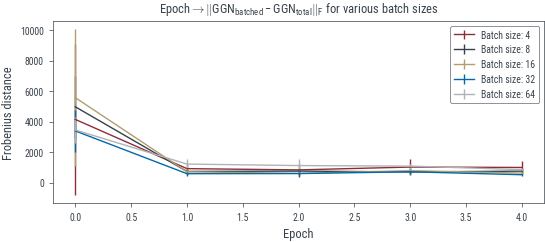

In [8]:
for batch_size_idx, batch_size in enumerate(batch_sizes):
    plt.errorbar(np.arange(n_epochs), frobenius_distances[batch_size_idx].mean(axis=1), frobenius_distances[batch_size_idx].std(axis=1, ddof=1), label=f"Batch size: {batch_size}")
plt.title("$\\text{Epoch} \\to \|\\text{GGN}_{\\text{batched}} - \\text{GGN}_{\\text{total}}\|_F$ for various batch sizes")
plt.xlabel("Epoch")
plt.ylabel("Frobenius distance")
plt.legend();

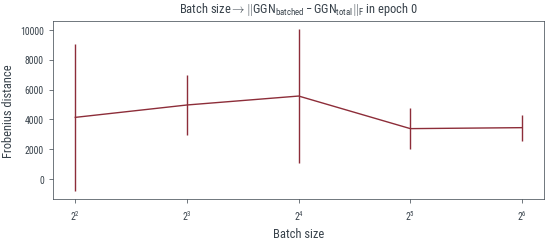

: 

In [11]:
plt.errorbar(batch_sizes, frobenius_distances[:, 0].mean(axis=1), frobenius_distances[:, 0].std(axis=1, ddof=1))
plt.xscale('log', base=2)
plt.title("$\\text{Batch size} \\to \|\\text{GGN}_{\\text{batched}} - \\text{GGN}_{\\text{total}}\|_F$ in epoch 0")
plt.xlabel("Batch size")
plt.ylabel("Frobenius distance");